In [3]:
import os
import json
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import shutil
import cv2

In [4]:
megapose_data_folder = '/home/icetenny/senior-1/Datasets_Megapose/Input'
output_data_folder = '/home/icetenny/senior-1/Datasets_Megapose/Processed_DETR'

os.makedirs(output_data_folder, exist_ok=True)

batch_folder_list = sorted(os.listdir(megapose_data_folder))[:1]

batch_folder_list

['00000000']

Copy Mask

In [ ]:
# total_obj = 0
# total_obj_vis = 0
# obj_list = []

# # output_rgb_folder = os.path.join(output_data_folder, 'rgb')
# output_mask_folder = os.path.join(output_data_folder, 'mask')

# # os.makedirs(output_rgb_folder, exist_ok=True)
# os.makedirs(output_mask_folder, exist_ok=True)

# for batch in sorted(batch_folder_list):
#     print(batch)
#     # Get all image id in current batch
#     available_image_id = [i.split(".")[0] for i in os.listdir(os.path.join(megapose_data_folder, batch)) if ".rgb." in i]
#     available_image_id = sorted(available_image_id)

#     for image_id in available_image_id:

#         seg_path = os.path.join(megapose_data_folder, batch, f"{image_id}.segmentation.png")

#         # Copy rgb to output
#         shutil.copy(seg_path, os.path.join(output_mask_folder, f'{image_id}.png'))


00000000
00000001
00000002
00000003
00000004
00000005
00000006
00000007
00000008
00000009


RGB and Instance Mask

In [3]:
total_obj = 0
total_obj_vis = 0
obj_list = []

output_rgb_folder = os.path.join(output_data_folder, 'rgb')
output_mask_folder = os.path.join(output_data_folder, 'mask')

os.makedirs(output_rgb_folder, exist_ok=True)
os.makedirs(output_mask_folder, exist_ok=True)

for batch in sorted(batch_folder_list):
    print(batch)
    # Get all image id in current batch
    available_image_id = [i.split(".")[0] for i in os.listdir(os.path.join(megapose_data_folder, batch)) if ".rgb." in i]
    available_image_id = sorted(available_image_id)

    for image_id in available_image_id:

        rgb_path = os.path.join(megapose_data_folder, batch, f"{image_id}.rgb.png")
        seg_path = os.path.join(megapose_data_folder, batch, f"{image_id}.segmentation.png")
        object_data_path = os.path.join(megapose_data_folder, batch, f"{image_id}.object_datas.json")

        # Copy rgb to output
        shutil.copy(rgb_path, os.path.join(output_rgb_folder, f'{image_id}.png'))

        with open(object_data_path, 'r') as file:
            object_data = json.load(file)
        file.close()

        for obj in object_data:
            total_obj += 1

            if obj['visib_fract'] > 0.3:
                total_obj_vis += 1

                obj_label = obj['label'].lstrip('gso_')
                obj_unique_id = obj['unique_id']

                output_obj_mask_folder = os.path.join(output_mask_folder, obj_label)

                # Make folder if not exist
                if not os.path.exists(output_obj_mask_folder):
                    os.makedirs(output_obj_mask_folder)
                    # print("Create", output_obj_mask_folder)

                # Load the segmentation mask
                mask = Image.open(seg_path).convert('L')  # Load as grayscale
                mask_array = np.array(mask)

                # Create a binary mask for the current object
                object_mask = (mask_array == obj_unique_id).astype(np.uint8) * 255  # Convert to binary image
                
                # Create a new image from the mask
                object_image = Image.fromarray(object_mask, 'L')  # 'L' for grayscale
                
                # Save the object image
                object_image.save(os.path.join(output_obj_mask_folder, f'{image_id}_{str(obj_unique_id).zfill(2)}.png'))
                

total_obj, total_obj_vis, len(obj_list)

00000007
00000008
00000009


(60000, 25108, 0)

In [86]:
unique_items = set(obj_list)
count = {item: obj_list.count(item) for item in unique_items}
print(count)  # Output: {'apple': 2, 'banana': 2, 'orange': 1}
len(count), max(count.values())


{'gso_Squirt_Strain_Fruit_Basket': 83, 'gso_STACKING_BEAR': 129, 'gso_Reebok_ALLYLYNN': 19, 'gso_Blue_Jasmine_Includes_Digital_Copy_UltraViolet_DVD': 75, 'gso_Office_Depot_Canon_CLI36_Remanufactured_Ink_Cartridge_TriColor': 37, 'gso_Reebok_SMOOTHFLEX_CUSHRUN_20': 84, 'gso_Crayola_Crayons_120_crayons': 78, 'gso_Pinwheel_Pencil_Case': 34, 'gso_ACE_Coffee_Mug_Kristen_16_oz_cup': 61, 'gso_Womens_Authentic_Original_Boat_Shoe_in_Classic_Brown_Leather_cJSCWiH7QmB': 70, 'gso_Perricone_MD_Omega_3_Supplements': 43, 'gso_Cascadia_8_Color_AquariusHibscsBearingSeaBlk_Size_50': 45, 'gso_Reebok_SH_COURT_MID_II': 42, 'gso_3M_Antislip_Surfacing_Light_Duty_White': 54, 'gso_Reebok_FUELTRAIN': 87, 'gso_Seagate_1TB_Backup_Plus_portable_drive_Blue': 33, 'gso_PureFlow_2_Color_RylPurHibiscusBlkSlvrWht_Size_50': 44, 'gso_SLACK_CRUISER': 44, 'gso_US_Army_Stash_Lunch_Bag': 43, 'gso_FRACTION_FUN_n4h4qte23QR': 72, 'gso_Organic_Whey_Protein_Unflavored': 51, 'gso_Whey_Protein_Vanilla_12_Packets': 16, 'gso_Ecoforms_P

(872, 198)

Annotation

In [ ]:
total_obj = 0
total_obj_vis = 0
obj_list = []

output_anno_folder = os.path.join(output_data_folder, 'annotation')

os.makedirs(output_anno_folder, exist_ok=True)

# Get image size
first_image_path = os.path.join(megapose_data_folder, batch_folder_list[0], f'{[i for i in os.listdir(os.path.join(megapose_data_folder, batch_folder_list[0])) if ".rgb." in i][0]}')
first_image = cv2.imread(first_image_path)
IMAGE_H, IMAGE_W, c = first_image.shape

for batch in sorted(batch_folder_list):
    # Get all image id in current batch
    available_image_id = [i.split(".")[0] for i in os.listdir(os.path.join(megapose_data_folder, batch)) if ".rgb." in i]
    available_image_id = sorted(available_image_id)

    for image_id in available_image_id[:1]:

        # rgb_path = os.path.join(megapose_data_folder, batch, f"{image_id}.rgb.png")
        # seg_path = os.path.join(megapose_data_folder, batch, f"{image_id}.segmentation.png")
        object_data_path = os.path.join(megapose_data_folder, batch, f"{image_id}.object_datas.json")

        # Copy rgb to output
        # shutil.copy(rgb_path, os.path.join(output_rgb_folder, f'{image_id}.png'))

        with open(object_data_path, 'r') as file:
            object_data = json.load(file)
        file.close()


        modified_annotation_dict = dict()


        for obj in object_data:
            total_obj += 1

            if obj['visib_fract'] > 0.3:

                total_obj_vis += 1

                obj_label = obj['label'].lstrip('gso_')
                obj_unique_id = obj['unique_id']

                print(image_id, obj["bbox_amodal"], obj_label)
                x1, y1 ,x2, y2 = obj["bbox_amodal"]

                x1 = max(0, x1)
                y1 = max(0, y1)

                x2 = min(x2, IMAGE_W)
                y2 = min(y2, IMAGE_H)

                cx = round(((x1+x2)/2) / IMAGE_W, 6)
                cy = round(((y1+y2)/2) / IMAGE_H, 6)

                w = round((x2-x1) / IMAGE_W, 6)
                h = round((y2-y1) / IMAGE_H, 6)

                print(cx,cy,w,h)

                if modified_annotation_dict.get(obj_label):
                    modified_annotation_dict[obj_label].append([obj_unique_id, cx, cy, w, h])
                    print(image_id)
                else:
                    modified_annotation_dict[obj_label] = [obj_unique_id, cx, cy, w, h] 

                # File path to save the JSON
                output_anno_path = os.path.join(output_anno_folder, f"{image_id}.json")
                

                # Write the data to the JSON file
                with open(output_anno_path, "w") as file:
                    json.dump(modified_annotation_dict, file, indent=4)



total_obj, total_obj_vis, len(obj_list)


001ac4b32bea9e8ac64f6d32ecce798507d99d8d [301, 314, 376, 453] Timberland_Mens_Earthkeepers_Casco_Bay_Suede_1Eye
0.470139 0.710185 0.104167 0.257407
001ac4b32bea9e8ac64f6d32ecce798507d99d8d [490, 247, 576, 443] UGG_Classic_Tall_Womens_Boots_Grey_7
0.740278 0.638889 0.119444 0.362963
001ac4b32bea9e8ac64f6d32ecce798507d99d8d [92, 244, 321, 514] Ecoforms_Plant_Container_QP_Turquoise
0.286806 0.701852 0.318056 0.5
001ac4b32bea9e8ac64f6d32ecce798507d99d8d [267, 177, 457, 329] MINI_FIRE_ENGINE
0.502778 0.468519 0.263889 0.281481
001ac4b32bea9e8ac64f6d32ecce798507d99d8d [541, 432, 806, 671] Ortho_Forward_Facing_QCaor9ImJ2G
0.875694 0.9 0.248611 0.2
001ac4b32bea9e8ac64f6d32ecce798507d99d8d [407, 255, 539, 314] Womens_Authentic_Original_Boat_Shoe_in_Classic_Brown_Leather_cJSCWiH7QmB
0.656944 0.526852 0.183333 0.109259
001ac4b32bea9e8ac64f6d32ecce798507d99d8d [139, -23, 332, 206] Office_Depot_HP_74XL75_Remanufactured_Ink_Cartridges_BlackTriColor_2_count
0.327083 0.190741 0.268056 0.381481
001ac4b

(20, 15, 0)

In [ ]:
image_id

'00014a0d9b9931f92a60dbcc283acd8d1dfe8ef9'

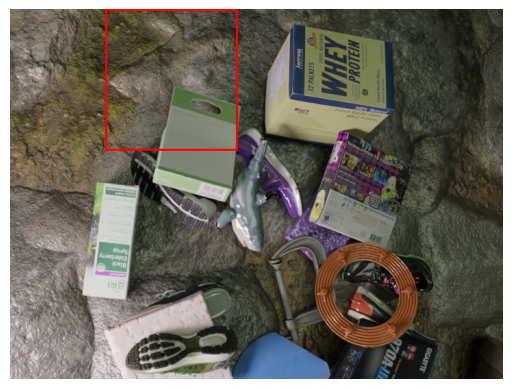

In [7]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import cv2

# Load the image
image_path = os.path.join(megapose_data_folder,batch, f'{image_id}.rgb.png')  # Replace with your image path
image = Image.open(image_path)


draw = ImageDraw.Draw(image)

# Draw the rectangle
x1, y1, x2, y2 = [139, 0, 332, 206]
draw.rectangle([x1, y1, x2, y2], outline="red", width=3)  # Red rectangle with 3-pixel width


# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

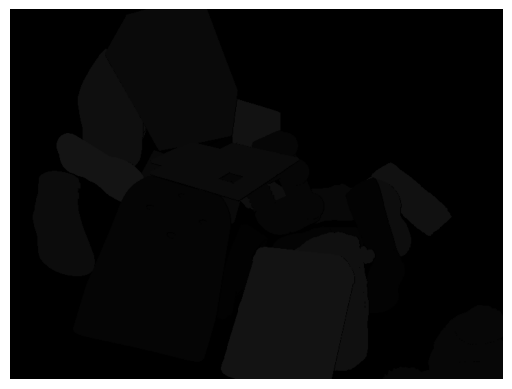

In [58]:
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image_path = os.path.join(megapose_data_folder, '001ac4b32bea9e8ac64f6d32ecce798507d99d8d.segmentation.png')  # Replace with your image path
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()


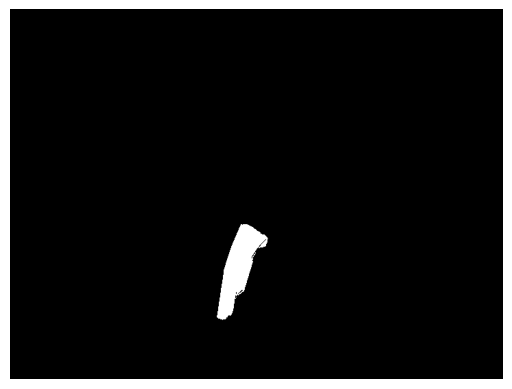

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the image
image_path = os.path.join(megapose_data_folder, '001ac4b32bea9e8ac64f6d32ecce798507d99d8d.segmentation.png')  # Replace with your image path
image = Image.open(image_path)
image_array = np.array(image)


# # Create a copy of the original image
# highlighted_image = image_array.copy()

# # Highlight where mask = 1
# highlight_color = [255, 0, 0]  # Red color in RGB
# highlighted_image[mask_array == 1] = highlight_color

# # Plot the images
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.imshow(image_array)
# plt.title('Original Image')
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.imshow(highlighted_image)
# plt.title('Highlighted Segmentation')
# plt.axis('off')

# plt.show()
image_array_2 = image_array.copy()
image_array_2[image_array ==2] = 255
image_array_2[image_array !=2] = 0
# Display the image
plt.imshow(image_array_2, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

In [53]:
np.unique(image_array), image_array.shape

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20], dtype=int32),
 (540, 720))

In [60]:
import numpy as np
from PIL import Image
import os

# Load the segmentation mask
mask_path = os.path.join(megapose_data_folder, '001ac4b32bea9e8ac64f6d32ecce798507d99d8d.segmentation.png')  # Replace with your mask path
mask = Image.open(mask_path).convert('L')  # Load as grayscale
mask_array = np.array(mask)

# Create a directory to save the output images
output_dir = output_data_folder  # Replace with your output directory
os.makedirs(output_dir, exist_ok=True)

# Loop through each object label from 1 to 20
for label in range(1, 21):
    # Create a binary mask for the current object
    object_mask = (mask_array == label).astype(np.uint8) * 255  # Convert to binary image
    
    # Create a new image from the mask
    object_image = Image.fromarray(object_mask, 'L')  # 'L' for grayscale
    
    # Save the object image
    object_image.save(os.path.join(output_dir, f'object_{label}.png'))

print("Images saved successfully.")


Images saved successfully.


In [63]:
# Load the image
image_path = os.path.join(output_data_folder, 'object_1.png')  # Replace with your image path
image = Image.open(image_path)
image_array = np.array(image)
image_array.shape
np.unique(image_array)

array([  0, 255], dtype=uint8)